# Z test sur les taux de conversion du groupe de contrôle A et du groupe de test B

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats as sms

In [ ]:
#import data
folder = 'C:/Users/Admin/Documents/Centrale Paris/3A/OMA/Projet/Donnees/'
annonceur = 'annonceur1/annonceur1'
campagne = 'annonceur1_campaign1_visite_engagee'
data = pd.read_hdf(folder + annonceur + '.hdf', key=campagne)

In [ ]:
def proportions(data):
    dataA = data.loc[data['group']=="A",:]
    dataB = data.loc[data['group']=="B",:]

    n1 = len(dataA)   
    n2 = len(dataB) 
    s1 = sum(dataA['is_conv'])
    s2 = sum(dataB['is_conv'])
    p1 = s1/n1
    p2 = s2/n2
    return dataA, dataB, n1, n2, s1, s2, p1, p2
    

In [10]:
def testZ(data):
    dataA, dataB, n1, n2, s1, s2, p1, p2 = proportions(data)

    Z = (p1-p2)/np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
    #Z = (s1-s2)/np.sqrt(s1+s2)
    Prej = 2*(1 - st.norm.cdf(abs(Z)))
    
    #mêmes valeurs obtenues avec fonction prédéfinie, meilleure précision pour la p-value Prej
    #test = sms.weightstats.ztest(dataA['is_conv'],dataB['is_conv']) 
    
    return Z, Prej

In [ ]:
def binom_distri(data):
    dataA, dataB, n1, n2, s1, s2, p1, p2 = proportions(data)
    
    fig, ax = plt.subplots(figsize=(12,6))
    xA = np.linspace(s1-49, s1+50, 100)
    yA = st.binom(n1, p1).pmf(xA)
    ax.bar(xA, yA, alpha=0.5)
    xB = np.linspace(s2-49, s2+50, 100)
    yB = st.binom(n2, p2).pmf(xB)
    ax.bar(xB, yB, alpha=0.5)
    plt.xlabel('Conversion eut lieu')
    plt.ylabel('Probabilité')
    plt.title('Distribution binomiale pour le groupe contrôle A (rouge) and le test B (bleu)')

In [ ]:
def norm_distri(data):
    dataA, dataB, n1, n2, s1, s2, p1, p2 = proportions(data)
    # standard error of the mean for both groups
    SE_A = np.sqrt(p1 * (1-p1)) / np.sqrt(n1)
    SE_B = np.sqrt(p2 * (1-p2)) / np.sqrt(n2)
    # plot the null and alternate hypothesis
    fig, ax = plt.subplots(figsize=(12,6))
    x = np.linspace(0.006, .01, 1000)
    yA = st.norm(p1, SE_A).pdf(x)
    ax.plot(x, yA,c='red')
    ax.axvline(x=p1, c='red', alpha=0.5, linestyle='--')
    yB = st.norm(p2, SE_B).pdf(x)
    ax.plot(x, yB,c='blue')
    ax.axvline(x=p2, c='blue', alpha=0.5, linestyle='--')
    plt.xlabel('Taux de conversion')
    plt.ylabel('Densité de probabilité')
    plt.title('Distribution normale pour le groupe contrôle A (rouge) and le test B (bleu)')


In [ ]:
#exemple de lancement avec les données chargées
testZ(data)
binom_distri(data)
norm_distri(data)

In [ ]:
#lancement sur toutes les campagnes
#annonceur 1
ann1 = 'annonceur1/annonceur1'
index1 = ['1_vi_2p','1_vi_e','2_vi_2p','2_vi_e','3_vi_2p',
          '3_vi_e','4_vi_2p','4_vi_e']
campag1 = [
    'annonceur1_campaign1_visite_2pages',
    'annonceur1_campaign1_visite_engagee',
    'annonceur1_campaign2_visite_2pages',
    'annonceur1_campaign2_visite_engagee',
    'annonceur1_campaign3_visite_2pages',
    'annonceur1_campaign3_visite_engagee',
    'annonceur1_campaign4_visite_2pages',
    'annonceur1_campaign4_visite_engagee'
]
A1 = pd.DataFrame(index = index1,columns = ['Z_stat','pvalue'])
i=0
for key1 in campag1:
    print(key1)
    data = pd.read_hdf(folder + ann1 + '.hdf', key=key1)
    test = testZ(data)
    A1['Z_stat'][index1[i]] = test[0]
    A1['pvalue'][index1[i]] = test[1]
    i = i + 1

In [ ]:
#annonceur 2    
ann2 = 'annonceur2/annonceur2'
index2 = ['1_ach','1_vi_p_pdt','1_vi_pan']
campag2 = [
    'annonceur2_campaign1_achat',
    'annonceur2_campaign1_visite_page_produit',
    'annonceur2_campaign1_visite_panier'
]
A2 = pd.DataFrame(index = index2,columns = ['Z_stat','pvalue'])
i=0
for key2 in campag2 :
    print(key2)
    data = pd.read_hdf(folder + ann2 + '.hdf', key=key2)
    test = testZ(data)
    A2['Z_stat'][index2[i]] = test[0]
    A2['pvalue'][index2[i]] = test[1]
    i = i + 1


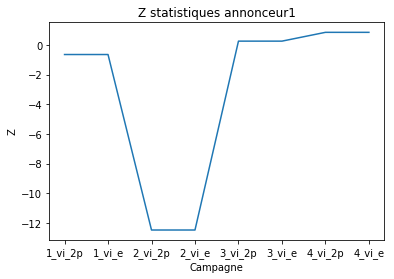

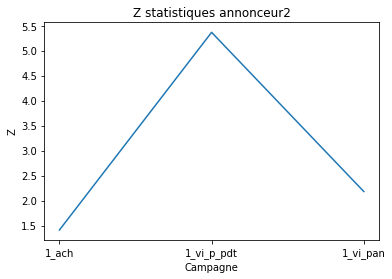

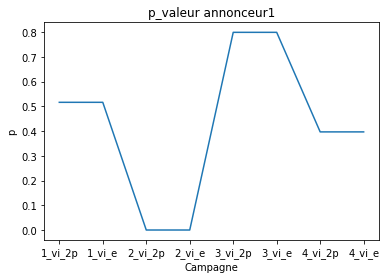

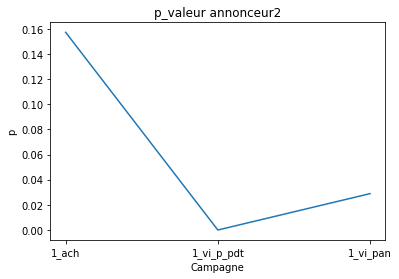

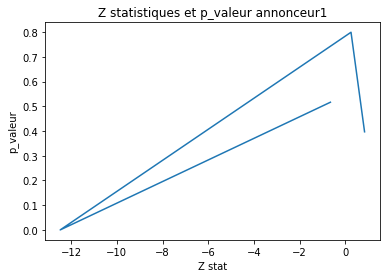

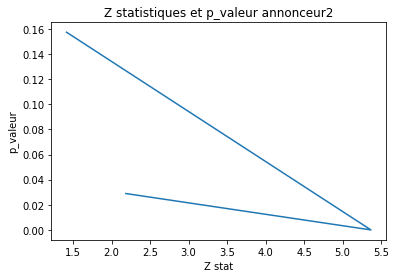

In [13]:
#plots
plt.plot(A1['Z_stat'])  
plt.title('Z statistiques annonceur1')  
plt.xlabel('Campagne')
plt.ylabel('Z')
plt.show()

plt.plot(A2['Z_stat'])  
plt.title('Z statistiques annonceur2')  
plt.xlabel('Campagne')
plt.ylabel('Z')
plt.show()

plt.plot(A1['pvalue'])  
plt.title('p_valeur annonceur1')  
plt.xlabel('Campagne')
plt.ylabel('p')
plt.show()

plt.plot(A2['pvalue'])  
plt.title('p_valeur annonceur2')  
plt.xlabel('Campagne')
plt.ylabel('p')
plt.show()

plt.plot(A1['Z_stat'],A1['pvalue'])  
plt.title('Z statistiques et p_valeur annonceur1')  
plt.xlabel('Z stat')
plt.ylabel('p_valeur')
plt.show()

plt.plot(A2['Z_stat'],A2['pvalue'])  
plt.title('Z statistiques et p_valeur annonceur2')  
plt.xlabel('Z stat')
plt.ylabel('p_valeur')
plt.show()